In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from numpy import genfromtxt

Using Theano backend.
/usr/local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
temp = genfromtxt(fname = '/Users/ckruse/Documents/GitHub/OldFaithful/Old_Faithful_Logger.tsv', delimiter = '	')
time = temp[1:-1,0]
temp = temp[1:-1,1]
np.shape(temp)

(282084,)

In [4]:
#Normalize deltas between -1 and 1

print(np.max(temp))

temp = temp/np.max(temp)*2 - 1
print(np.max(temp))

58.153888888889
1.0


In [5]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

(282066, 17)


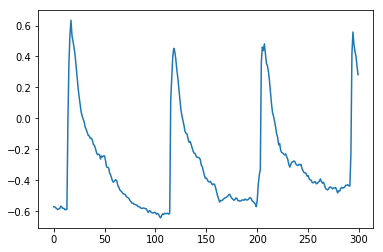

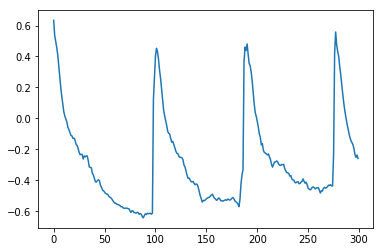

(282066, 17, 1)
(282066,)


In [43]:
X, Y = create_dataset(temp, 17)

print(X.shape)
plt.plot(X[0:300,0])
plt.show()
plt.plot(Y[0:300])
plt.show()
X = X.reshape(X.shape[0], X.shape[1], 1)
Y = Y.reshape(Y.shape[0])

print(X.shape)
print(Y.shape)


In [44]:
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten

model = Sequential()

model.add(Conv1D(filters=8, kernel_size=16, activation='relu', input_shape=(np.shape(X)[1],np.shape(X)[2]), strides=8))
#model.add(Conv1D(filters=16, kernel_size=4, activation='relu', strides=1))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['mse'])



In [45]:
from keras.models import load_model

epochs = 10

#model = load_model('/Users/ckruse/Documents/python/oldFaithfulTemp.h5')
history = model.fit(X,
                    Y,
                    epochs=epochs,
                    verbose=1,
                    batch_size=256,
                    validation_split=0.1,
                    shuffle=True)

model.save('/Users/ckruse/Documents/python/oldFaithfulTemp.h5')
plt.plot(history.history['loss'])
plt.show()

plt.plot(history.history['val_loss'])
plt.show()

#score = model.evaluate(data_stack, label_stack, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
#model.save('/Users/ckruse/Documents/python/soccer/model.h5')

Train on 253859 samples, validate on 28207 samples
Epoch 1/10
253859/253859 [==============================] - 1s - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 2/10
253859/253859 [==============================] - 1s - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 3/10
253859/253859 [==============================] - 1s - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4/10
253859/253859 [==============================] - 1s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 5/10
253859/253859 [==============================] - 1s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 6/10
253859/253859 [==============================] - 1s - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0152 - val_mean_squared_error: 0.

RuntimeError: Unable to create link (Name already exists)

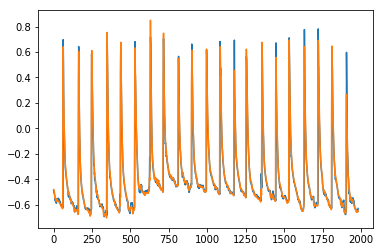

In [46]:
trainPredict = model.predict(X)
plt.plot(trainPredict[280084:282084])
plt.plot(Y[280084:282084])
plt.show()

In [17]:
print(trainPredict)
print(Y[0:1])

[[-0.30483162]
 [-0.3111542 ]
 [-0.34264132]
 ...
 [-0.64135855]
 [-0.6442747 ]
 [-0.6453012 ]]
[-0.38551926]


In [24]:
print(np.shape(X)[1])

150
